# Import Lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
from skimpy import skim
import missingno as msno

# Load Dataset

In [2]:
data_df = pd.read_csv('./data/used_car_dataset.csv')
data_df

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"
...,...,...,...,...,...,...,...,...,...,...,...
9577,Skoda,Octavia,2014,10,"105,904 km",Automatic,second,Diesel,Oct-24,"Skoda Octavia 1.9 Elegance TDI, 2014, Diesel","₹ 10,40,000"
9578,Maruti Suzuki,Alto-800,2020,4,"55,000 km",Manual,first,Hybrid/CNG,Nov-24,"Maruti Suzuki Alto 800 CNG LXI Optional, 2020,...","₹ 3,75,000"
9579,Maruti Suzuki,Ritz,2013,11,"92,000 km",Manual,first,Diesel,Nov-24,"Maruti Suzuki Ritz VDi, 2013, Diesel","₹ 4,15,000"
9580,Hyundai,Verna,2019,5,"72,000 km",Automatic,first,Petrol,Oct-24,"Hyundai Verna VTVT 1.6 AT SX Option, 2019, Petrol","₹ 8,55,000"


# Understanding Dataset

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


In [4]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,9582.0,2016.361094,4.087226,1986.0,2014.0,2017.0,2019.0,2024.0
Age,9582.0,7.638906,4.087226,0.0,5.0,7.0,10.0,38.0


In [5]:
data_df.describe(include= "object").T

,count,unique,top,freq
Brand,9582,39,Maruti Suzuki,2720
model,9582,400,City,330
kmDriven,9535,1910,"65,000 km",198
Transmission,9582,2,Manual,4800
Owner,9582,2,first,4800
FuelType,9582,3,Diesel,3840
PostedDate,9582,12,Nov-24,8693
AdditionInfo,9582,7307,"BMW 5 Series 3.0 530D M Sport, 2016, Diesel",26
AskPrice,9582,1330,"₹ 4,50,000",134


In [6]:
skim(data_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9582   │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 11     │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA   ┃ NA %   ┃ mean     ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Year            │    0 │      0 │     2016 │   4.087 │   1986 │   2014 │   2017 │   2019 │  2024 │    ▂▇▇  │  │
│ │ Age             │    0 │      0 │    7.639 │   4.087 │      0 │      5 │      7 │     10 │    38 │   ▇▇▂   │  │
│ └─────────────────┴──────┴────────┴──────────┴─────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Brand                      │      0 │          0 │                          1.3 │                    12374 │  │
│ │ model                      │      0 │          0 │                          1.2 │                    11519 │  │
│ │ kmDriven                   │     47 │       0.49 │                            2 │                    19070 │  │
│ │ Transmission               │      0 │          0 │                            1 │                     9582 │  │
│ │ Owner                      │      0 │          0 │                            1 │                     9582 │  │
│ │ FuelType                   │      0 │          0 │                            1 │                     9582 │  │
│ │ PostedDate                 │      0 │          0 │                            1 │                     9582 │  │
│ │ AdditionInfo               │      0 │          0 │                          7.6 │                    72830 │  │
│ │ AskPrice                   │      0 │          0 │                            2 │                    19164 │  │
│ └────────────────────────────┴────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

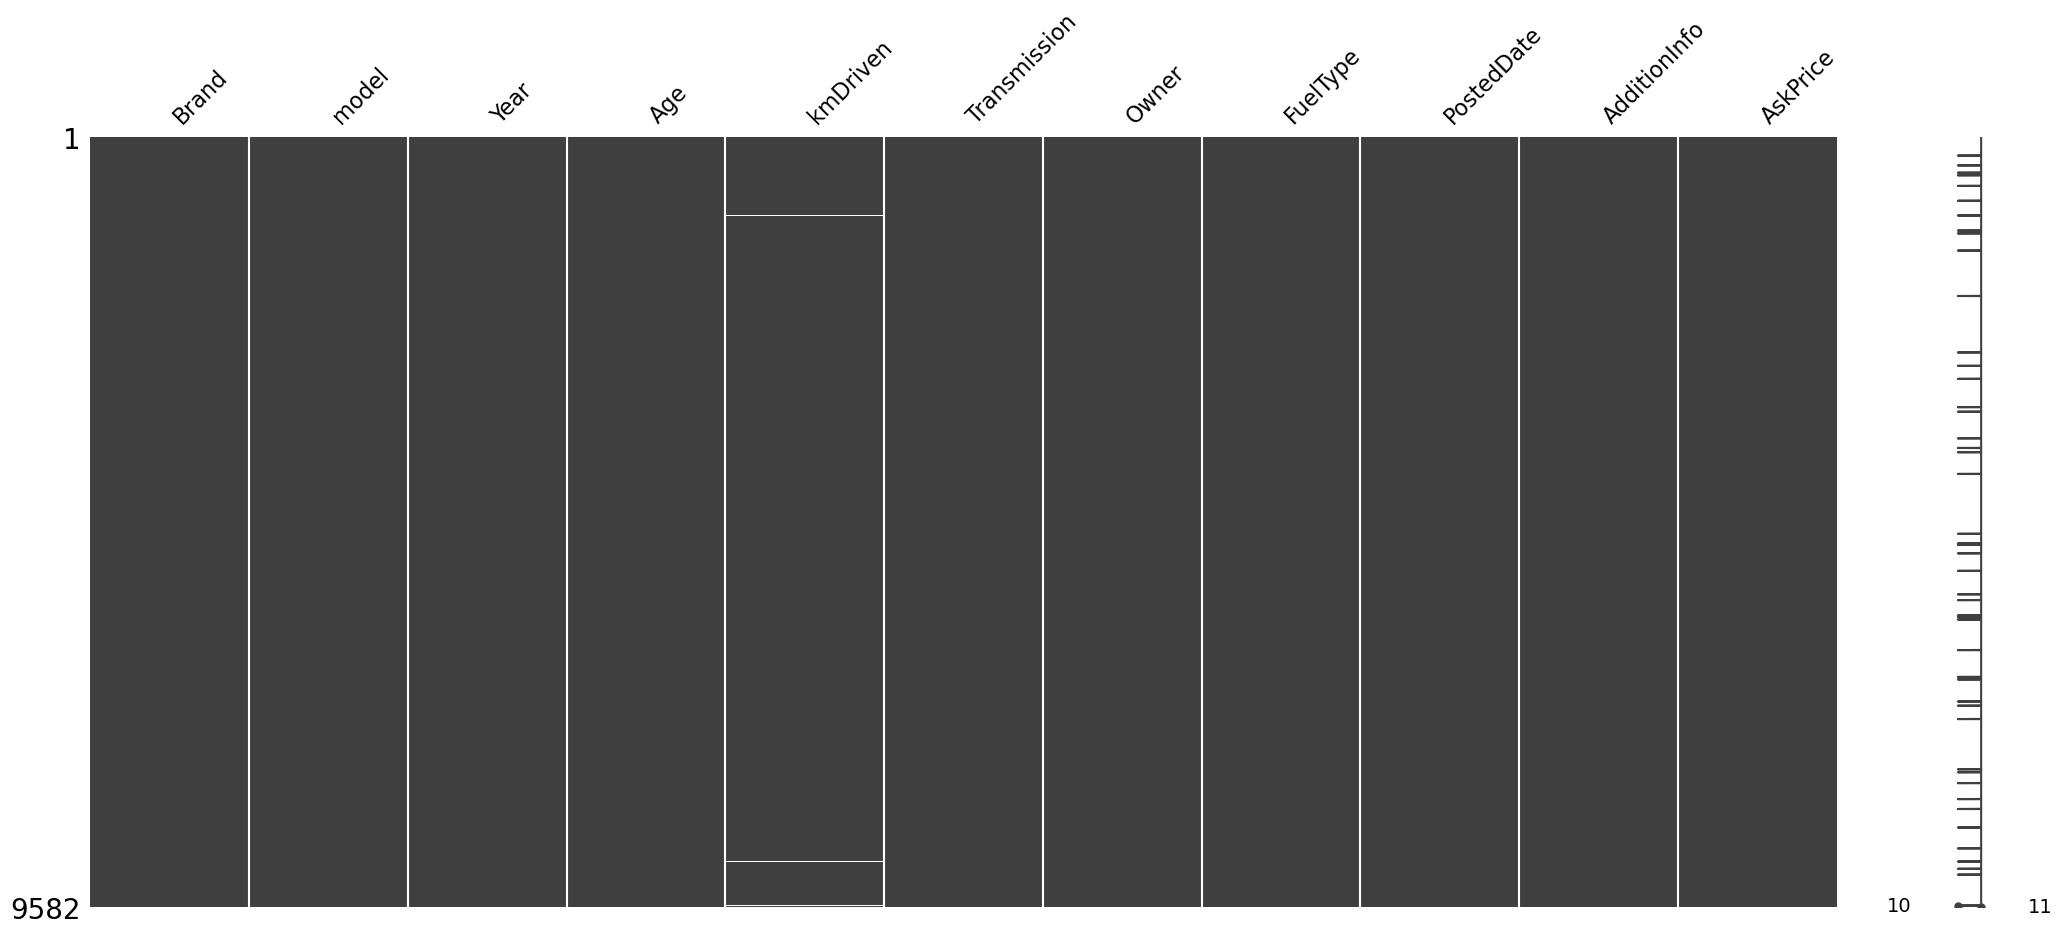

In [7]:
msno.matrix(data_df);

In [8]:
data_df.isnull().sum()

Brand            0
model            0
Year             0
Age              0
kmDriven        47
Transmission     0
Owner            0
FuelType         0
PostedDate       0
AdditionInfo     0
AskPrice         0
dtype: int64

# Organizing Columns

## Car Listings Data Description

### **Columns and Their Descriptions**

- **Brand:**  
  The car manufacturer (e.g., Volkswagen, Maruti Suzuki, Honda, Tata).

- **Model:**  
  The specific car model (e.g., Taigun, Baleno, Polo, WRV).

- **Year:**  
  The manufacturing year of the vehicle (ranging from older models to 2024).

- **Age:**  
  The age of the vehicle in years (calculated based on the current year).

- **kmDriven:**  
  The total kilometers driven by the vehicle.

- **Transmission:**  
  The type of transmission:
  - **Manual**
  - **Automatic**

- **Owner:**  
  The ownership status:
  - First owner
  - Second owner

- **FuelType:**  
  The type of fuel the vehicle uses:
  - Petrol
  - Diesel
  - Hybrid/CNG

- **PostedDate:**  
  The date when the car listing was posted.

- **AdditionalInfo:**  
  Additional details about the vehicle (e.g., special features, condition, etc.).

- **AskPrice:**  
  The listed price of the vehicle in Indian Rupees (₹).


### Brand column

In [9]:
data_df['Brand'].unique()

array(['Honda', 'Toyota', 'Volkswagen', 'Maruti Suzuki', 'BMW', 'Ford',
       'Kia', 'Mercedes-Benz', 'Hyundai', 'Audi', 'Renault', 'MG',
       'Volvo', 'Skoda', 'Tata', 'Mahindra', 'Mini', 'Land Rover', 'Jeep',
       'Chevrolet', 'Jaguar', 'Fiat', 'Aston Martin', 'Porsche', 'Nissan',
       'Force', 'Mitsubishi', 'Lexus', 'Isuzu', 'Datsun', 'Ambassador',
       'Rolls-Royce', 'ICML', 'Bajaj', 'Opel', 'Ashok', 'Bentley',
       'Ssangyong', 'Maserati'], dtype=object)

### model column

In [10]:
print(data_df['model'].unique()[:5])

['City' 'Innova' 'VentoTest' 'Swift' 'Baleno']


### year column

In [11]:
data_df['Year'].unique()

array([2001, 2009, 2010, 2017, 2019, 2014, 2020, 2018, 2021, 2012, 2007,
       2016, 2015, 2023, 2011, 2022, 2013, 2006, 2005, 2024, 1998, 2008,
       2004, 1994, 2002, 2003, 1997, 2000, 1990, 1996, 1999, 1986],
      dtype=int64)

### Age column

In [12]:
data_df['Age'].unique()

array([23, 15, 14,  7,  5, 10,  4,  6,  3, 12, 17,  8,  9,  1, 13,  2, 11,
       18, 19,  0, 26, 16, 20, 30, 22, 21, 27, 24, 34, 28, 25, 38],
      dtype=int64)

### kmDriven column

In [13]:
data_df['kmDriven'].nunique()

1910

In [14]:
print(data_df['kmDriven'].unique()[:5])

['98,000 km' '190000.0 km' '77,246 km' '83,500 km' '45,000 km']


In [15]:
data_df['kmDriven'].dtype

dtype('O')

=> Have to convert to float 

### Transmission column

In [16]:
data_df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

=> change type to category if we want using ML

### Owner column

In [17]:
data_df['Owner'].unique()

array(['second', 'first'], dtype=object)

=> can change value to integer

### FuelType column

In [18]:
data_df['FuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid/CNG'], dtype=object)

### PostedDate column

In [19]:
data_df['PostedDate'].unique()

array(['Nov-24', 'Jul-24', 'Oct-24', 'Aug-24', 'Sep-24', 'May-24',
       'Jun-24', 'Apr-24', 'Jan-24', 'Feb-24', 'Dec-23', 'Mar-24'],
      dtype=object)

=> we can convert to datetime **format="%b-%y"**

### AdditionInfo column

In [20]:
data_df['AdditionInfo'].nunique()

7307

In [21]:
data_df['AdditionInfo'].dtype

dtype('O')

In [22]:
print(data_df['AdditionInfo'].unique()[:5])

['Honda City v teck in mint condition, valid genuine car,'
 'Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, Diesel'
 'Volkswagen Vento 2010-2013 Diesel Breeze, 2010, Diesel'
 'Maruti Suzuki Swift 2017 Diesel Good Condition'
 'Maruti Suzuki Baleno Alpha CVT, 2019, Petrol']


We have to split this str to title,yearDebut,typeOil hmmm later

### AskPrice column

In [23]:
data_df['AskPrice'].nunique()

1330

In [24]:
data_df['AskPrice'].dtype

dtype('O')

In [25]:
print(data_df['AskPrice'].unique()[:5])

['₹ 1,95,000' '₹ 3,75,000' '₹ 1,84,999' '₹ 5,65,000' '₹ 6,85,000']


remove **₹** and **,** so convert to float

## Clean and convert columns data

In [26]:
#kmDriven
data_df['kmDriven'] = data_df['kmDriven'].str.replace(',','').str.replace(' km','').astype('float')

In [27]:
#PostedDate
data_df['PostedDate'] = pd.to_datetime(data_df['PostedDate'], format="%b-%y")
data_df['PostedDate'] = data_df['PostedDate'].apply(lambda x: x.replace(day=1) if x.day == 1 else x)

In [28]:
#AdditionInfo
data_df['AdditionInfo'] = data_df['AdditionInfo'].str.split(',').str[0]

In [29]:
data_df.head(5)

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,98000.0,Manual,second,Petrol,2024-11-01,Honda City v teck in mint condition,"₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0,Manual,second,Diesel,2024-07-01,Toyota Innova 2.5 G (Diesel) 7 Seater,"₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,77246.0,Manual,first,Diesel,2024-11-01,Volkswagen Vento 2010-2013 Diesel Breeze,"₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,83500.0,Manual,second,Diesel,2024-11-01,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,45000.0,Automatic,first,Petrol,2024-11-01,Maruti Suzuki Baleno Alpha CVT,"₹ 6,85,000"


i think AdditionInfo column not important because this column is Brand+model+year+FuelType merged 

In [30]:
#AskPrice
data_df['AskPrice'] = data_df['AskPrice'].str.replace('₹','').str.replace(',','').astype('float')

In [31]:
data_df.head(5)

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,98000.0,Manual,second,Petrol,2024-11-01,Honda City v teck in mint condition,195000.0
1,Toyota,Innova,2009,15,190000.0,Manual,second,Diesel,2024-07-01,Toyota Innova 2.5 G (Diesel) 7 Seater,375000.0
2,Volkswagen,VentoTest,2010,14,77246.0,Manual,first,Diesel,2024-11-01,Volkswagen Vento 2010-2013 Diesel Breeze,184999.0
3,Maruti Suzuki,Swift,2017,7,83500.0,Manual,second,Diesel,2024-11-01,Maruti Suzuki Swift 2017 Diesel Good Condition,565000.0
4,Maruti Suzuki,Baleno,2019,5,45000.0,Automatic,first,Petrol,2024-11-01,Maruti Suzuki Baleno Alpha CVT,685000.0


PostedDate column not important because 2023 and 2024 very near kkkk

# Data Visualization

In [32]:
data_df['Brand'].nunique()

39

In [33]:
brand_counts = data_df['Brand'].value_counts()
brand_counts_grouped = brand_counts.copy()
brand_counts_grouped['Other'] = brand_counts_grouped.loc['Force':].sum()
brand_counts_grouped = brand_counts_grouped.sort_values(ascending = False)
brand_counts_grouped = brand_counts_grouped.drop(brand_counts_grouped.index[29:])
brand_counts_grouped

Brand
Maruti Suzuki    2720
Hyundai          1529
Honda             802
Toyota            777
Mahindra          560
Mercedes-Benz     402
Tata              389
BMW               342
Volkswagen        318
Audi              264
Ford              245
Renault           240
Skoda             183
Kia               161
Chevrolet          89
MG                 80
Nissan             75
Jeep               74
Land Rover         71
Volvo              48
Mini               41
Jaguar             34
Porsche            24
Datsun             22
Other              22
Fiat               22
Lexus              20
Mitsubishi         18
Isuzu              10
Name: count, dtype: int64

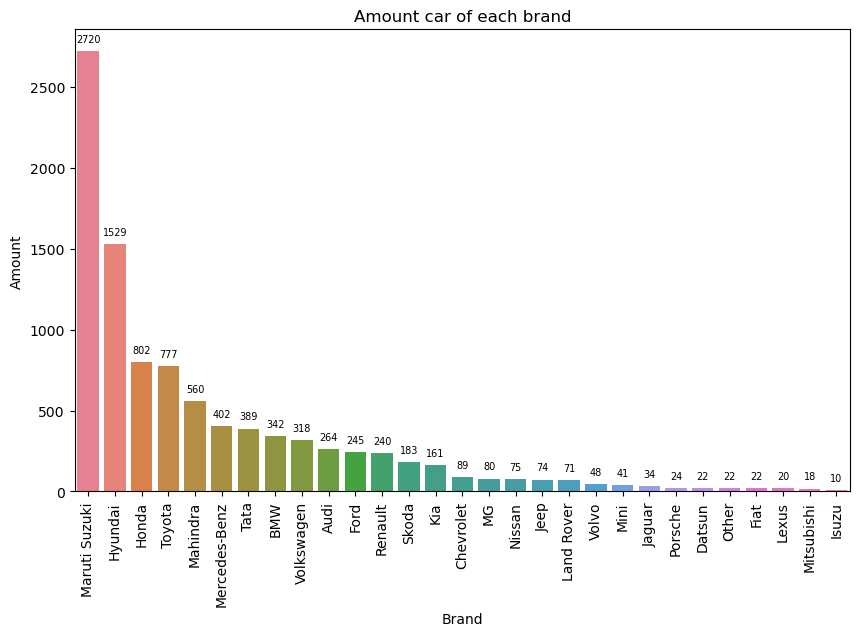

In [34]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data = brand_counts_grouped.reset_index(), x = 'Brand', y = 'count', hue = 'Brand' )
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',        
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom',        
                fontsize=7, color='black', xytext=(0, 5), textcoords='offset points')
plt.ylabel('Amount')
plt.title('Amount car of each brand')
plt.show();

wordcloud

In [35]:
mask = np.array(Image.open('./logo.png'))
mask = np.invert(mask)

mask[mask >128] =255
mask[mask <=128] = 0

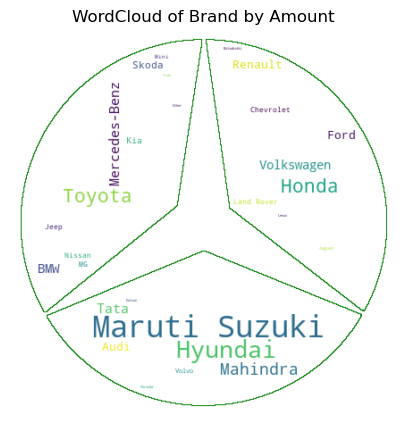

In [36]:
brand_counts_df = brand_counts_grouped.reset_index()
Brand_dict = dict(zip(brand_counts_df['Brand'], brand_counts_df['count']))
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      mask = mask,
                      colormap='viridis',
                      contour_color = 'green',
                      contour_width = 1).generate_from_frequencies(Brand_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Brand by Amount")
plt.show()

In [37]:
#check model of another brand
brand_df = data_df[data_df['Brand']=='Toyota']
brand_df['model'].unique()

array(['Innova', 'Corolla', 'Innova Crysta', '2.8 Legender 4X2',
       'Fortuner', 'Etios', 'Camry', 'Glanza', 'Etios Liva',
       'Innova Hycross', 'Corolla Altis', 'Urban Cruiser', 'VELLFIRE',
       'Land Cruiser', 'Etios Cross', 'Yaris', 'Urban Cruiser Hyryder',
       'Land Cruiser Prado', 'Estima'], dtype=object)

In [38]:
model_per_brand_counts = brand_df['model'].value_counts()
model_per_brand_counts_df = model_per_brand_counts.reset_index()
model_per_brand_counts

model
Innova Crysta            179
Fortuner                 161
Innova                   122
Corolla Altis             81
Etios                     49
Camry                     38
Innova Hycross            27
Glanza                    21
Etios Liva                19
2.8 Legender 4X2          19
Urban Cruiser Hyryder     18
Corolla                   12
Urban Cruiser              7
VELLFIRE                   7
Land Cruiser               6
Yaris                      6
Etios Cross                2
Land Cruiser Prado         2
Estima                     1
Name: count, dtype: int64

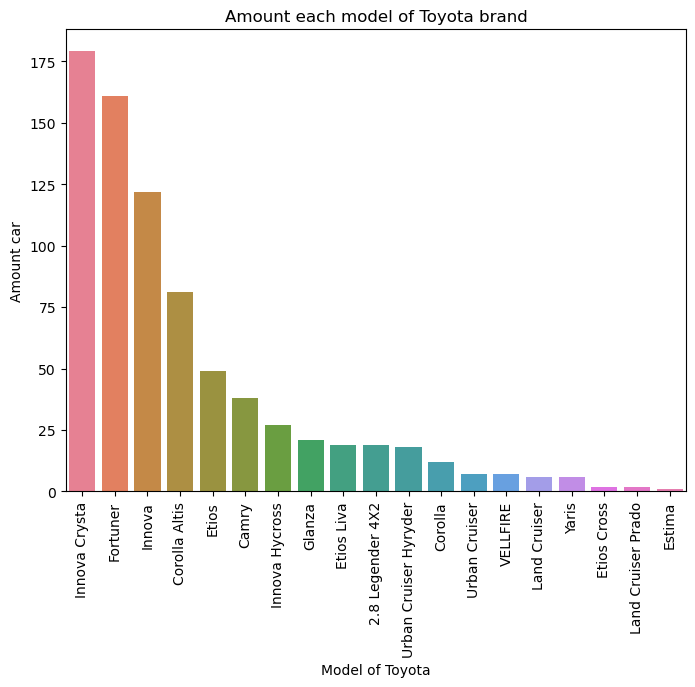

In [39]:
plt.figure(figsize=(8,6))
sns.barplot(data = model_per_brand_counts_df, x = 'model', hue = 'model', y = 'count')
plt.xticks(rotation = 90)
plt.ylabel('Amount car')
plt.xlabel('Model of Toyota')
plt.title('Amount each model of Toyota brand')
plt.show();

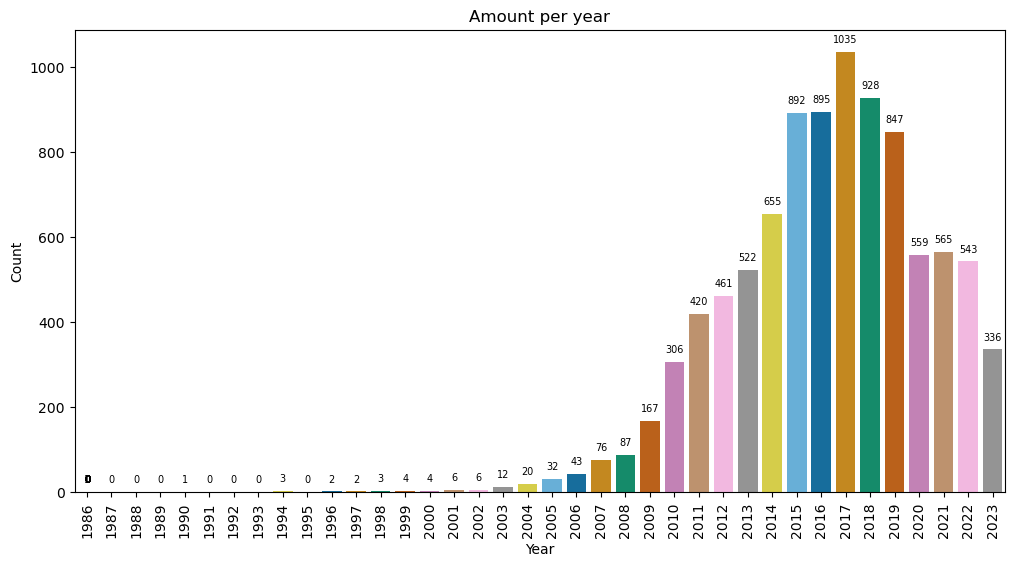

In [40]:
#year
#first group and count eachn year and list full year started min to max
year_counts = data_df['Year'].value_counts()
year_sorted_df = year_counts.reset_index().sort_values(by ='Year') #change to dataframe and sort
all_years = list(range(year_sorted_df['Year'].min(), year_sorted_df['Year'].max())) #make array full year min to max
df_full = pd.DataFrame({'Year': all_years}) #create dataframe (column year full)
df_full = df_full.merge(year_sorted_df, on='Year', how='left') #merge 2 dataframe
df_full['Count'] = df_full['count'].fillna(0).astype(int) #fill NaN by 0
df_full.drop(columns=['count']) #drop count column
plt.figure(figsize=(12,6))
ax = sns.barplot(data = df_full, x = 'Year', y = 'Count', palette = 'colorblind', hue = 'Year')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',        
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom',        
                fontsize=7, color='black', xytext=(0, 5), textcoords='offset points')
plt.legend().set_visible(False) # tắt chú thích
plt.title('Amount per year')
plt.show();

column Age is sub of posted and year columns, so i will skip this column hehe

In [41]:
#kmDriven
data_df['kmDriven'].mean()

70605.89145254326

average 70605 km driven

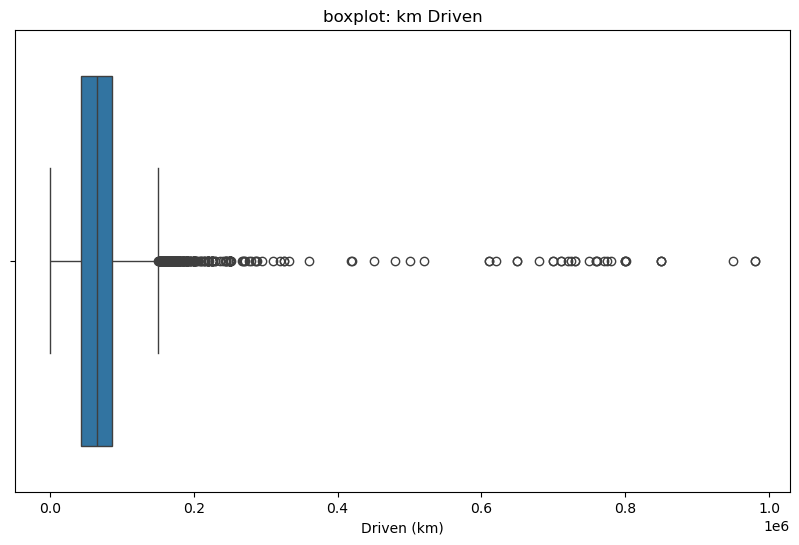

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(data= data_df, x = 'kmDriven')
plt.title("boxplot: km Driven")
plt.xlabel('Driven (km)')
plt.show();

i want use scatterplot display brand and kmDriven

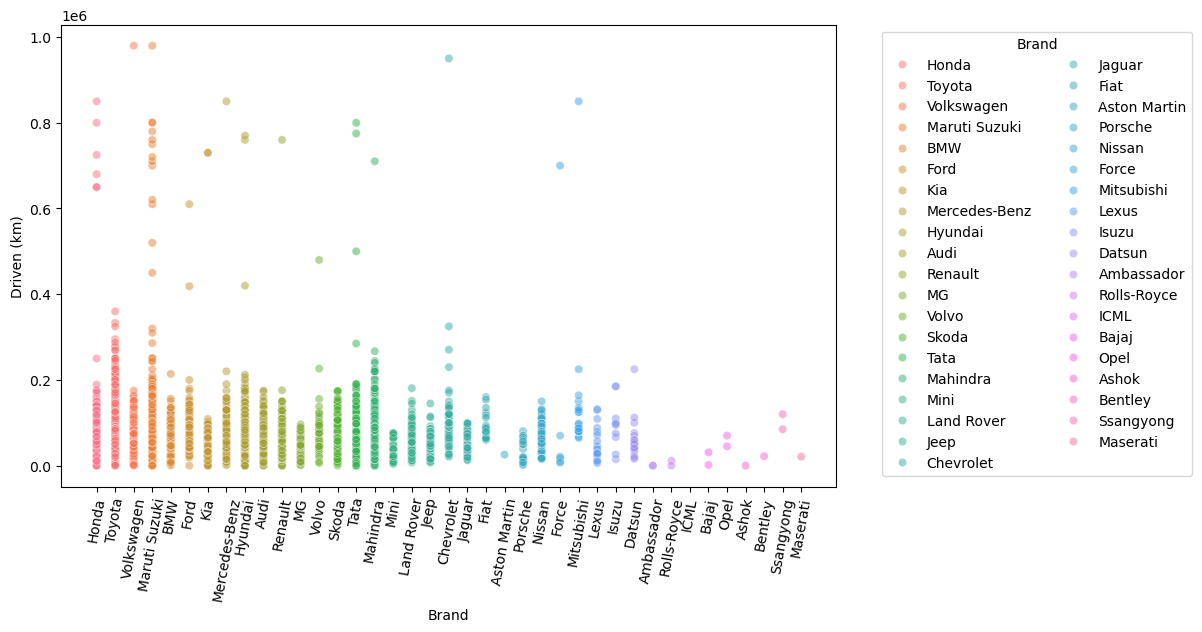

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = data_df,  x = 'Brand', y = 'kmDriven', hue = 'Brand', alpha = 0.5)
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc='upper left',ncol = 2) #chú thích ra ngoài và 2 cột
plt.xticks(rotation = 80)
plt.ylabel('Driven (km)')
plt.show();

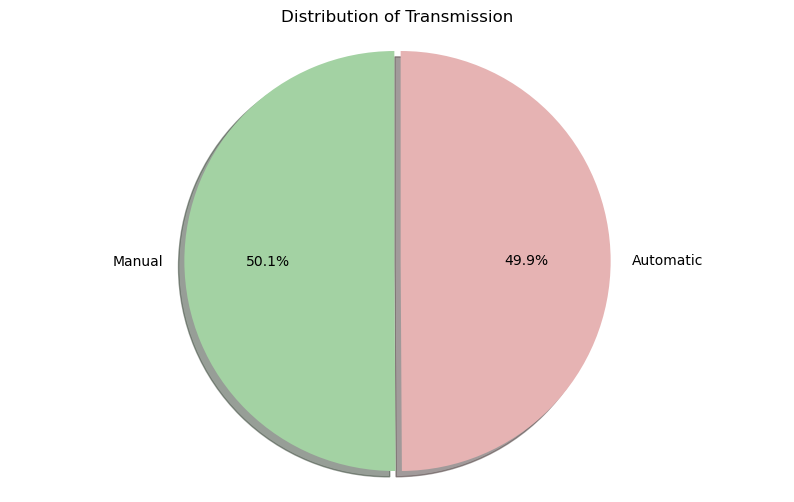

In [44]:
#Transmission
colors = ['#A3D2A3', '#E6B3B3', '#C7E1A6', '#B3E0E0', '#A0D7D7', '#C2C7E1', '#D9E1C3', '#A3C1AD', '#A2D6A6', '#B3E5BB']
trans_counts = data_df['Transmission'].value_counts()
plt.figure(figsize = (10,6))
plt.pie(trans_counts, #parameter is series
       labels = trans_counts.index,
       autopct ='%1.1f%%',
       colors = colors,
       shadow = True,
        startangle = 90,
        explode=[0.03,0]
       )
plt.title('Distribution of Transmission')
plt.axis('equal')
plt.show()

In [45]:
trans_counts

Transmission
Manual       4800
Automatic    4782
Name: count, dtype: int64

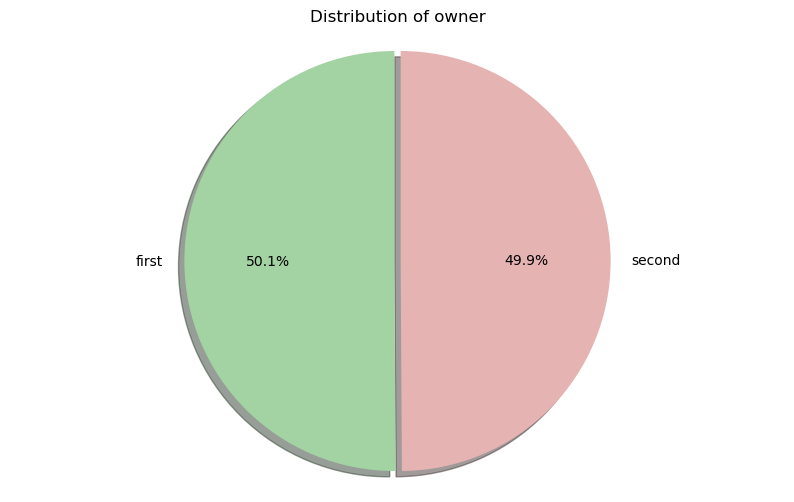

In [46]:
#Owner
owner_counts = data_df['Owner'].value_counts()
plt.figure(figsize = (10,6))
plt.pie(owner_counts, #parameter is series
       labels = owner_counts.index,
       autopct ='%1.1f%%',
       colors = colors,
       shadow = True,
        startangle = 90,
        explode=[0.03,0]
       )
plt.title('Distribution of owner')
plt.axis('equal')
plt.show()

In [47]:
owner_counts

Owner
first     4800
second    4782
Name: count, dtype: int64

In [48]:
#AskPrice
price_counts = data_df.groupby(by = 'Brand')['AskPrice'].mean().astype('int')
price_counts_df = price_counts.reset_index()
price_counts

Brand
Ambassador         434866
Ashok               32000
Aston Martin     26400000
Audi              1684355
BMW               2851446
Bajaj              284500
Bentley          18500000
Chevrolet          253820
Datsun             254090
Fiat               258313
Force             1136833
Ford              1086432
Honda              521991
Hyundai            599557
ICML               195000
Isuzu             1547900
Jaguar            2402676
Jeep              1726680
Kia               1388540
Land Rover        5533901
Lexus             7413750
MG                1611738
Mahindra           957167
Maruti Suzuki      486635
Maserati          8000000
Mercedes-Benz     3574789
Mini              2815463
Mitsubishi         800677
Nissan             457253
Opel               129000
Porsche           7900791
Renault            432356
Rolls-Royce      21367500
Skoda              921366
Ssangyong          407500
Tata               672362
Toyota            1772189
Volkswagen         708059
Volvo 

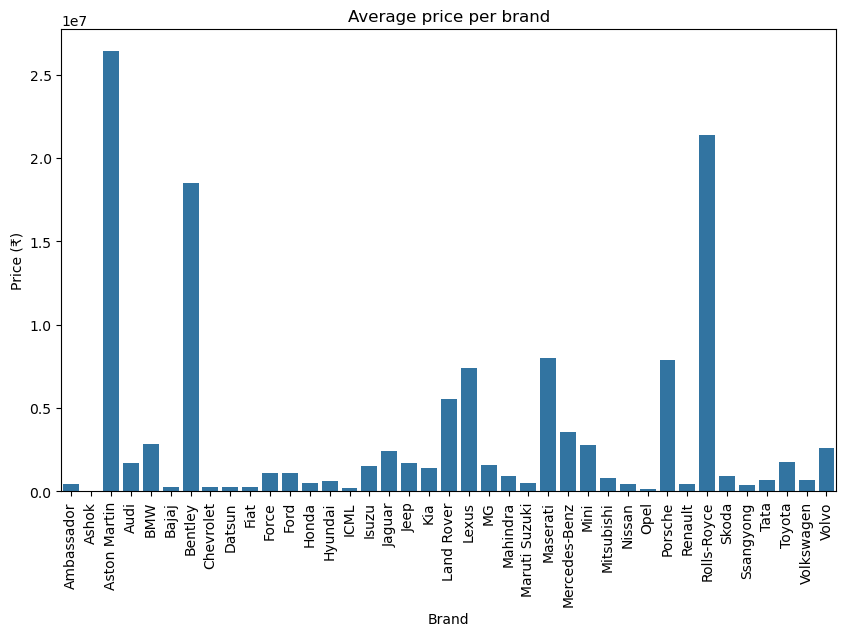

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(data = price_counts_df, x = 'Brand', y = 'AskPrice')
plt.xticks(rotation = 90)
plt.ylabel('Price (₹)')
plt.title('Average price per brand')
plt.show();

In [50]:
#Price per model of another brand
Toyota_df = data_df[data_df['Brand']=='Toyota']
average_price_per_model_toyota = Toyota_df.groupby(by ='model')['AskPrice'].mean().astype(int)
average_price_per_model_toyota_df= average_price_per_model_toyota.reset_index()
average_price_per_model_toyota 

model
2.8 Legender 4X2          4240052
Camry                     1646716
Corolla                    206362
Corolla Altis              537995
Estima                    2300000
Etios                      443471
Etios Cross                484500
Etios Liva                 518210
Fortuner                  2439546
Glanza                     724623
Innova                     852998
Innova Crysta             1951235
Innova Hycross            3299851
Land Cruiser             11899833
Land Cruiser Prado        4750000
Urban Cruiser             1056428
Urban Cruiser Hyryder     1916388
VELLFIRE                 10742857
Yaris                      758333
Name: AskPrice, dtype: int32

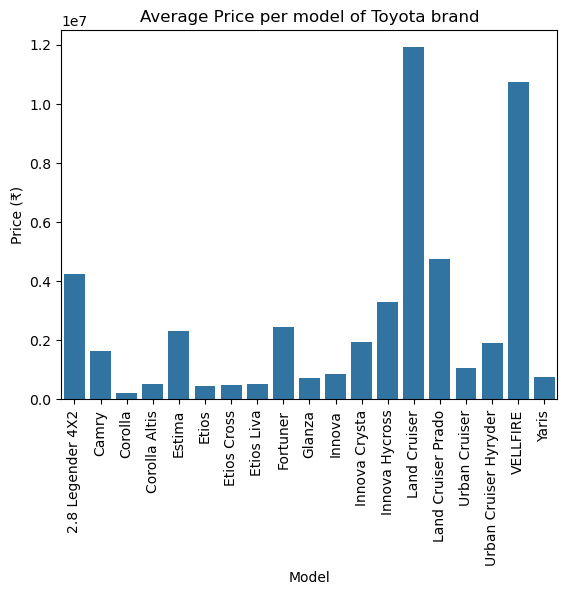

In [51]:
sns.barplot(data = average_price_per_model_toyota_df, x = 'model', y = 'AskPrice')
plt.xticks(rotation = 90)
plt.ylabel('Price (₹)')
plt.xlabel('Model')
plt.title('Average Price per model of Toyota brand')
plt.show()

# ML

In [52]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Brand         9582 non-null   object        
 1   model         9582 non-null   object        
 2   Year          9582 non-null   int64         
 3   Age           9582 non-null   int64         
 4   kmDriven      9535 non-null   float64       
 5   Transmission  9582 non-null   object        
 6   Owner         9582 non-null   object        
 7   FuelType      9582 non-null   object        
 8   PostedDate    9582 non-null   datetime64[ns]
 9   AdditionInfo  9582 non-null   object        
 10  AskPrice      9582 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 823.6+ KB


### Change type column to category

In [53]:
columns_feature = ['Brand','model','Transmission','Owner','FuelType']
for column in columns_feature:
    data_df[column] = data_df[column].astype('category')

### drop non-important columns

In [54]:
columns_drop = ['PostedDate','AdditionInfo']
data_df= data_df.drop(columns = columns_drop)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Brand         9582 non-null   category
 1   model         9582 non-null   category
 2   Year          9582 non-null   int64   
 3   Age           9582 non-null   int64   
 4   kmDriven      9535 non-null   float64 
 5   Transmission  9582 non-null   category
 6   Owner         9582 non-null   category
 7   FuelType      9582 non-null   category
 8   AskPrice      9582 non-null   float64 
dtypes: category(5), float64(2), int64(2)
memory usage: 376.7 KB


### Randomforest

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [56]:
encoder = LabelEncoder()
category_columns = data_df.select_dtypes(include='category').columns.tolist()
for category in category_columns:
    data_df[category] = encoder.fit_transform(data_df[category])

In [58]:
data_df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,AskPrice
0,12,84,2001,23,98000.0,1,1,2,195000.0
1,36,187,2009,15,190000.0,1,1,0,375000.0
2,37,347,2010,14,77246.0,1,0,0,184999.0
3,23,317,2017,7,83500.0,1,1,0,565000.0
4,23,52,2019,5,45000.0,0,0,2,685000.0


In [110]:
data_df.isnull().sum()

Brand            0
model            0
Year             0
Age              0
kmDriven        47
Transmission     0
Owner            0
FuelType         0
AskPrice         0
dtype: int64

In [117]:
data_df['kmDriven'] = data_df['kmDriven'].fillna(data_df['kmDriven'].mean())

In [118]:
data_df.isnull().sum()

Brand           0
model           0
Year            0
Age             0
kmDriven        0
Transmission    0
Owner           0
FuelType        0
AskPrice        0
dtype: int64

make X and y

In [119]:
X = data_df.drop(columns = ['AskPrice'])
y = data_df['AskPrice']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [122]:
y_pred = rf_clf.predict(X_test)

In [123]:
y_pred

array([295000., 159000., 435000., ..., 625101., 699999., 490000.])

In [124]:
y_test

9224    475000.0
3464    180000.0
6984    300000.0
4132    575000.0
4955    975000.0
          ...   
3509    630000.0
3334    750000.0
2260    775000.0
7695    210000.0
6712    875000.0
Name: AskPrice, Length: 1917, dtype: float64

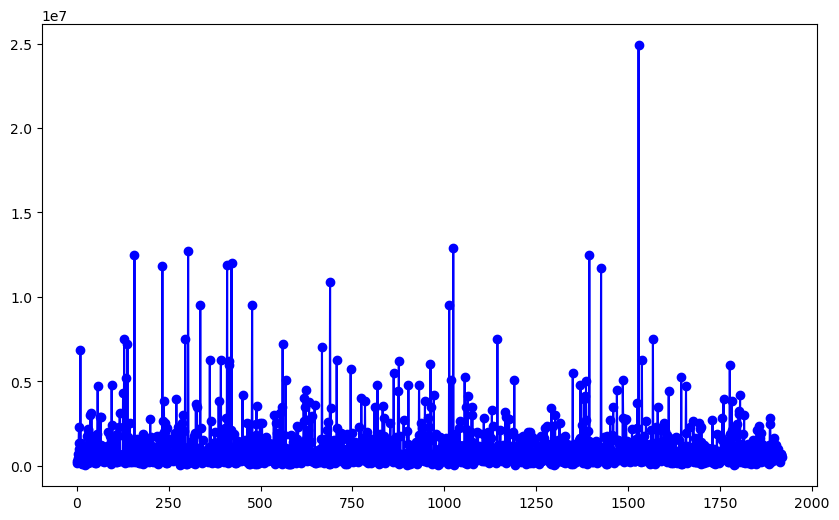

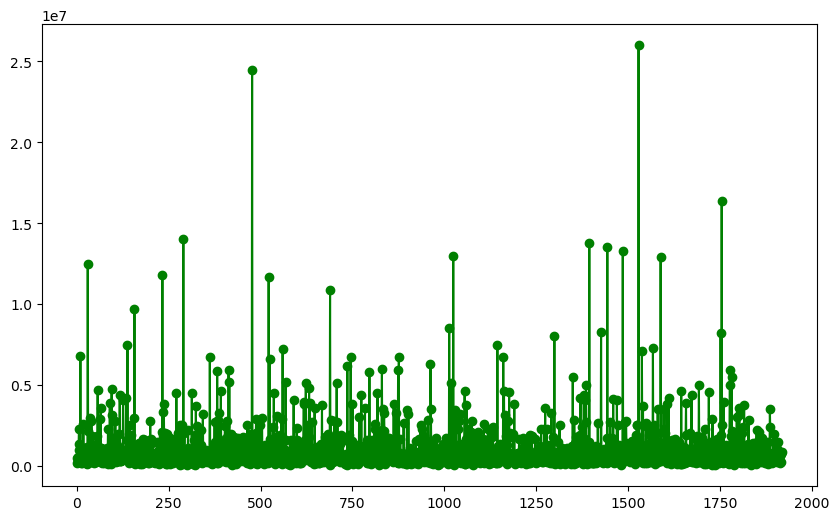

In [125]:

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(y_pred) + 1), y_pred, marker='o', linestyle='-', color='blue', label='Values')
y_test.reset_index()['AskPrice']
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(y_pred) + 1), y_test.reset_index()['AskPrice'], marker='o', linestyle='-', color='green', label='Values')

In [126]:
y_test_df = y_test.reset_index()['AskPrice']
y_test_df = y_test_df.reset_index()

In [127]:
y_pred_df = pd.DataFrame({
    'index': range(1, len(y_pred) + 1),  # Dãy index bắt đầu từ 1
    'AskPrice': y_pred  # Giá trị từ array
})

print(y_pred_df)

      index  AskPrice
0         1  295000.0
1         2  159000.0
2         3  435000.0
3         4  665000.0
4         5  975000.0
...     ...       ...
1912   1913  625000.0
1913   1914  670000.0
1914   1915  625101.0
1915   1916  699999.0
1916   1917  490000.0

[1917 rows x 2 columns]


In [128]:
df_diff = pd.merge(y_test_df, y_pred_df, on='index', suffixes=('_test', '_pred'))
df_diff['Difference'] = df_diff['AskPrice_test'] - df_diff['AskPrice_pred']

print(df_diff)

      index  AskPrice_test  AskPrice_pred  Difference
0         1       180000.0       295000.0   -115000.0
1         2       300000.0       159000.0    141000.0
2         3       575000.0       435000.0    140000.0
3         4       975000.0       665000.0    310000.0
4         5      2290000.0       975000.0   1315000.0
...     ...            ...            ...         ...
1911   1912       630000.0       190000.0    440000.0
1912   1913       750000.0       625000.0    125000.0
1913   1914       775000.0       670000.0    105000.0
1914   1915       210000.0       625101.0   -415101.0
1915   1916       875000.0       699999.0    175001.0

[1916 rows x 4 columns]


In [129]:
diff_abs = df_diff['Difference'].abs()
diff_abs

0        115000.0
1        141000.0
2        140000.0
3        310000.0
4       1315000.0
          ...    
1911     440000.0
1912     125000.0
1913     105000.0
1914     415101.0
1915     175001.0
Name: Difference, Length: 1916, dtype: float64

In [130]:
diff_abs.reset_index()

,index,Difference
0,0,115000.0
1,1,141000.0
2,2,140000.0
3,3,310000.0
4,4,1315000.0
...,...,...
1911,1911,440000.0
1912,1912,125000.0
1913,1913,105000.0
1914,1914,415101.0


<Axes: xlabel='index', ylabel='Difference'>

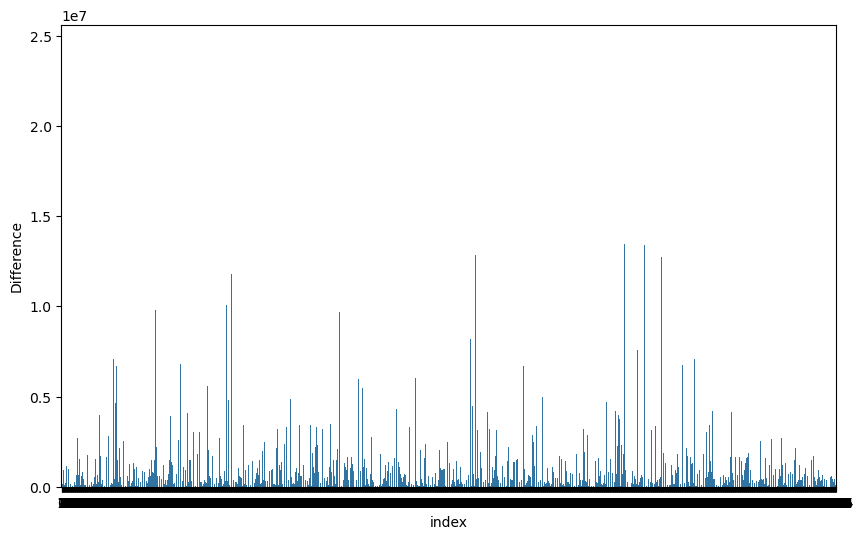

In [131]:
plt.figure(figsize=(10,6))
sns.barplot(data = diff_abs.reset_index(), x = 'index', y = 'Difference')

In [132]:
rf_clf.score(X_test, y_test)

0.15388628064684404